# Soal nomor 1
Diberikan dataset kampanye marketing.
Buatlah clustering untuk menyegmentasikan pelanggan menggunakan metode-metode clustering yang telah di ajarkan di lab. Tentukan jumlah cluster terbaik, visualisasikan cluster yang terbentuk, dan interpretasikan hasilnya, jangan lupa lakukan data cleaning dan preprocessing jika diperlukan.

Penjelasan per fitur\
AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise\
AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise\
AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise\
AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise\
AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise\
Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise\
Complain - 1 if customer complained in the last 2 years\
DtCustomer - date of customer’s enrolment with the company\
Education - customer’s level of education\
Marital - customer’s marital status\
Kidhome - number of small children in customer’s household\
 Teenhome - number of teenagers in customer’s household\
 Income - customer’s yearly household income\
MntFishProducts - amount spent on fish products in the last 2 years\
MntMeatProducts - amount spent on meat products in the last 2 years\
MntFruits - amount spent on fruits products in the last 2 years\
MntSweetProducts - amount spent on sweet products in the last 2 years\
MntWines - amount spent on wine products in the last 2 years\
MntGoldProds - amount spent on gold products in the last 2 years\
NumDealsPurchases - number of purchases made with discount\
NumCatalogPurchases - number of purchases made using catalogue\
NumStorePurchases - number of purchases made directly in stores\
NumWebPurchases - number of purchases made through company’s web site\
NumWebVisitsMonth - number of visits to company’s web site in the last month\
Recency - number of days since the last purchase\
Z_CostContact - Cost to contact a customer\
Z_Revenue - Revenue after client accepting campaign

# Import library
Import library yang dibutuhkan terlebih dahulu untuk pengolahan dan visualisasi data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Import dataset
Import dataset pada soal nomor 1 dengan separatornya adalah tab

In [2]:
dataset1 = pd.read_csv('marketing_campaign.csv', sep='\t')
dataset1

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [3]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# Data Preprocessing
## 1. Melihat jumlah data null pada dataset

In [4]:
print(dataset1.isna().sum().to_string())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0


Pada kolom 'Income' memiliki nilai NA yang berarti missing values sebanyak 24 entri. Observasi yang berisi entri-entri tersebut harus dilakukan deletion karena jumlahnya yang tidak banyak dibandingkan dengan total observasi.

## 2. Menghapus kolom-kolom fitur yang dirasa tidak berguna dari DataFrame secara permanen

In [5]:
dataset1.drop(['ID','Education','Marital_Status','Dt_Customer','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Complain','Response','Z_Revenue','Z_CostContact','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth'],axis=1, inplace=True)

In [6]:
dataset1

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,1957,58138.0,0,0,58,635,88,546,172,88,88
1,1954,46344.0,1,1,38,11,1,6,2,1,6
2,1965,71613.0,0,0,26,426,49,127,111,21,42
3,1984,26646.0,1,0,26,11,4,20,10,3,5
4,1981,58293.0,1,0,94,173,43,118,46,27,15
...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,61223.0,0,1,46,709,43,182,42,118,247
2236,1946,64014.0,2,1,56,406,0,30,0,0,8
2237,1981,56981.0,0,0,91,908,48,217,32,12,24
2238,1956,69245.0,0,1,8,428,30,214,80,30,61


## 3. Melihat jumlah data duplikat pada dataset

In [7]:
dataset1.duplicated().sum()

205

## 4. Deletion
Deletion dilakukan pada observasi dengan duplikasi dan nilai NaN yang sedikit pada suatu kolom, yaitu pada kolom Income

In [8]:
dataset1[dataset1['Income'].isna()]

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
10,1983,NaN,1,0,11,5,5,6,0,2,1
27,1986,NaN,1,0,19,5,1,3,3,263,362
43,1959,NaN,0,0,80,81,11,50,3,2,39
48,1951,NaN,2,1,96,48,5,48,6,10,7
58,1982,NaN,1,0,57,11,3,22,2,2,6
71,1973,NaN,1,0,25,25,3,43,17,4,17
90,1957,NaN,2,1,4,230,42,192,49,37,53
91,1957,NaN,1,1,45,7,0,8,2,0,1
92,1973,NaN,0,0,87,445,37,359,98,28,18
128,1961,NaN,0,1,23,352,0,27,10,0,15


In [9]:
dataset1.drop(dataset1[dataset1['Income'].isna()].index.tolist(),axis=0)

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,1957,58138.0,0,0,58,635,88,546,172,88,88
1,1954,46344.0,1,1,38,11,1,6,2,1,6
2,1965,71613.0,0,0,26,426,49,127,111,21,42
3,1984,26646.0,1,0,26,11,4,20,10,3,5
4,1981,58293.0,1,0,94,173,43,118,46,27,15
...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,61223.0,0,1,46,709,43,182,42,118,247
2236,1946,64014.0,2,1,56,406,0,30,0,0,8
2237,1981,56981.0,0,0,91,908,48,217,32,12,24
2238,1956,69245.0,0,1,8,428,30,214,80,30,61


In [10]:
dataset1 = dataset1.reset_index()
dataset1.drop('index', axis=1, inplace=True)

In [11]:
dataset1[dataset1.duplicated()]

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
83,1963,38620.0,0,0,56,112,17,44,34,22,89
179,1951,78497.0,0,0,44,207,26,447,75,0,223
281,1976,51369.0,0,1,84,297,7,79,0,11,182
282,1946,37760.0,0,0,20,84,5,38,150,12,28
363,1978,37717.0,1,0,31,9,0,6,4,1,5
...,...,...,...,...,...,...,...,...,...,...,...
2218,1978,22775.0,1,0,40,5,1,8,0,0,1
2221,1982,75777.0,0,0,12,712,26,538,69,13,80
2225,1968,58554.0,1,1,55,368,24,68,38,0,88
2234,1974,34421.0,1,0,81,3,3,7,6,2,9


In [12]:
dataset1_dropped = dataset1.drop(dataset1[dataset1.duplicated()].index.tolist(),axis=0)
dataset1_dropped

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,1957,58138.0,0,0,58,635,88,546,172,88,88
1,1954,46344.0,1,1,38,11,1,6,2,1,6
2,1965,71613.0,0,0,26,426,49,127,111,21,42
3,1984,26646.0,1,0,26,11,4,20,10,3,5
4,1981,58293.0,1,0,94,173,43,118,46,27,15
...,...,...,...,...,...,...,...,...,...,...,...
2233,1977,666666.0,1,0,23,9,14,18,8,1,12
2235,1967,61223.0,0,1,46,709,43,182,42,118,247
2237,1981,56981.0,0,0,91,908,48,217,32,12,24
2238,1956,69245.0,0,1,8,428,30,214,80,30,61


## 5. Reindex
kita perlu reindex dataframe supaya tidak hancur

In [13]:
dataset1_reset = dataset1_dropped.reset_index()
dataset1_reset.drop('index', axis=1, inplace=True)
dataset1_reset

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,1957,58138.0,0,0,58,635,88,546,172,88,88
1,1954,46344.0,1,1,38,11,1,6,2,1,6
2,1965,71613.0,0,0,26,426,49,127,111,21,42
3,1984,26646.0,1,0,26,11,4,20,10,3,5
4,1981,58293.0,1,0,94,173,43,118,46,27,15
...,...,...,...,...,...,...,...,...,...,...,...
2030,1977,666666.0,1,0,23,9,14,18,8,1,12
2031,1967,61223.0,0,1,46,709,43,182,42,118,247
2032,1981,56981.0,0,0,91,908,48,217,32,12,24
2033,1956,69245.0,0,1,8,428,30,214,80,30,61


## 6. EDA untuk outlier
Membuat boxplot

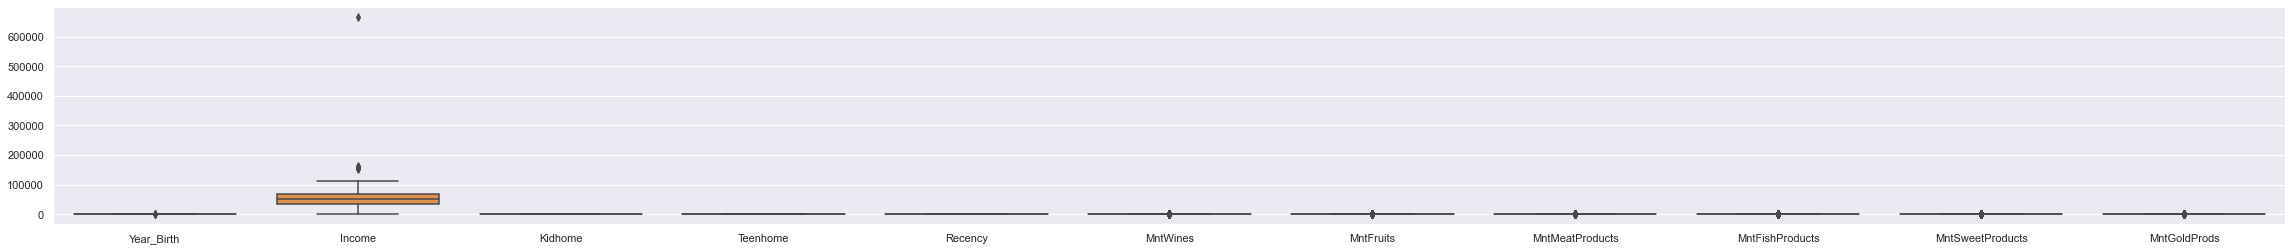

In [14]:
sns.set(rc={"figure.figsize":(40, 4)})
sns.boxplot(data=dataset1_reset)
plt.show()

Menghilangkan outlier

In [15]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

for i in dataset1_reset:
    dataset1_reset = remove_outlier(dataset1_reset, i)
dataset1_nonol = dataset1_reset

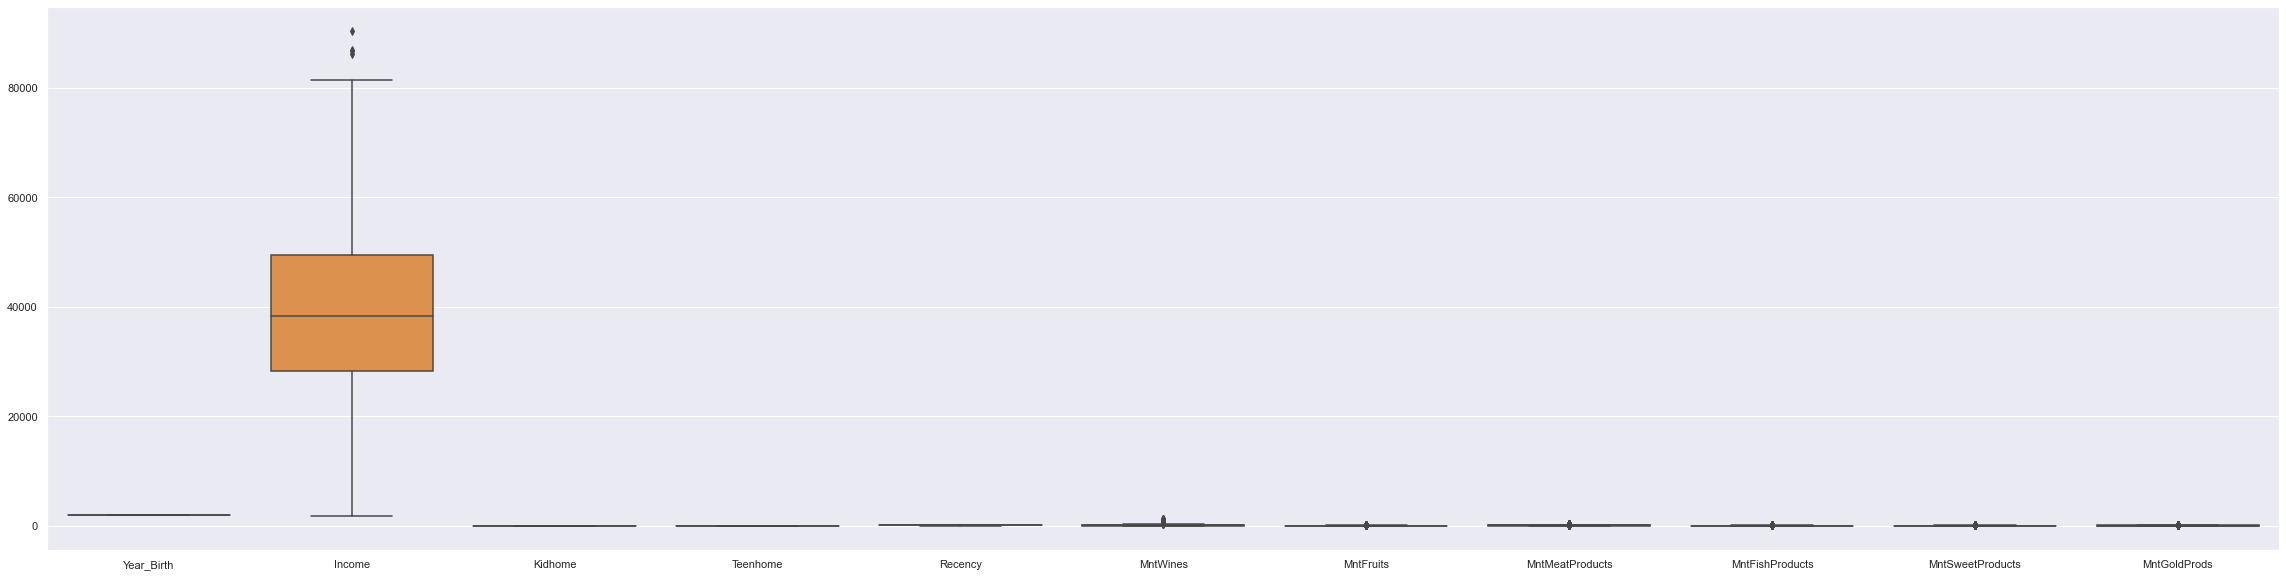

In [16]:
sns.set(rc={"figure.figsize":(40, 10)})
sns.boxplot(data=dataset1_nonol)
plt.show()

In [17]:
dataset1_nonol

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
1,1954,46344.0,1,1,38,11,1,6,2,1,6
3,1984,26646.0,1,0,26,11,4,20,10,3,5
7,1985,33454.0,1,0,32,76,10,56,3,1,23
8,1974,30351.0,1,0,19,14,0,24,3,3,2
9,1950,5648.0,1,1,68,28,0,6,1,1,13
...,...,...,...,...,...,...,...,...,...,...,...
2027,1984,11012.0,1,0,82,24,3,26,7,1,23
2028,1970,44802.0,0,0,71,853,10,143,13,10,20
2029,1986,26816.0,0,0,50,5,1,6,3,4,3
2032,1981,56981.0,0,0,91,908,48,217,32,12,24


reindex lagi

In [18]:
dataset1_nonol_reset = dataset1_nonol.reset_index()
dataset1_nonol_reset.drop('index', axis=1, inplace=True)
dataset1_nonol_reset

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,1954,46344.0,1,1,38,11,1,6,2,1,6
1,1984,26646.0,1,0,26,11,4,20,10,3,5
2,1985,33454.0,1,0,32,76,10,56,3,1,23
3,1974,30351.0,1,0,19,14,0,24,3,3,2
4,1950,5648.0,1,1,68,28,0,6,1,1,13
...,...,...,...,...,...,...,...,...,...,...,...
1116,1984,11012.0,1,0,82,24,3,26,7,1,23
1117,1970,44802.0,0,0,71,853,10,143,13,10,20
1118,1986,26816.0,0,0,50,5,1,6,3,4,3
1119,1981,56981.0,0,0,91,908,48,217,32,12,24


## 7. Data Scaling
menggunakan library sklearn MinMaxScaler untuk menscaling semua data pada setiap fiturnya

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [20]:
dataset1_scaled = pd.DataFrame(data=scaler.fit_transform(dataset1_nonol_reset), columns=dataset1_nonol_reset.columns)
dataset1_scaled

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,0.250000,0.504016,0.5,0.5,0.383838,0.009291,0.014085,0.017045,0.043478,0.041667,0.089552
1,0.785714,0.281483,0.5,0.0,0.262626,0.009291,0.056338,0.056818,0.217391,0.125000,0.074627
2,0.803571,0.358394,0.5,0.0,0.323232,0.064189,0.140845,0.159091,0.065217,0.041667,0.343284
3,0.607143,0.323339,0.5,0.0,0.191919,0.011824,0.000000,0.068182,0.065217,0.125000,0.029851
4,0.178571,0.044263,0.5,0.5,0.686869,0.023649,0.000000,0.017045,0.021739,0.041667,0.194030
...,...,...,...,...,...,...,...,...,...,...,...
1116,0.785714,0.104861,0.5,0.0,0.828283,0.020270,0.042254,0.073864,0.152174,0.041667,0.343284
1117,0.535714,0.486596,0.0,0.0,0.717172,0.720439,0.140845,0.406250,0.282609,0.416667,0.298507
1118,0.821429,0.283403,0.0,0.0,0.505051,0.004223,0.014085,0.017045,0.065217,0.166667,0.044776
1119,0.732143,0.624185,0.0,0.0,0.919192,0.766892,0.676056,0.616477,0.695652,0.500000,0.358209


# Clustering

In [21]:
dataset1_x = dataset1_nonol_reset

## 1. Elbow Method

In [22]:
from sklearn.cluster import KMeans
sns.set(rc={"figure.figsize":(8, 4)})
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dataset1_x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

AttributeError: 'NoneType' object has no attribute 'split'

TADI BISA PAKE ELBOW TIBA2 MASALAH GARA2 KEPENCET RUN ALL ANEH BANGET ASLI. Makanya saya kurang setuju bila 3 soal tersebut dikerjakan dalam satu file. Berikut adalah hasil sebelum error terjadi.
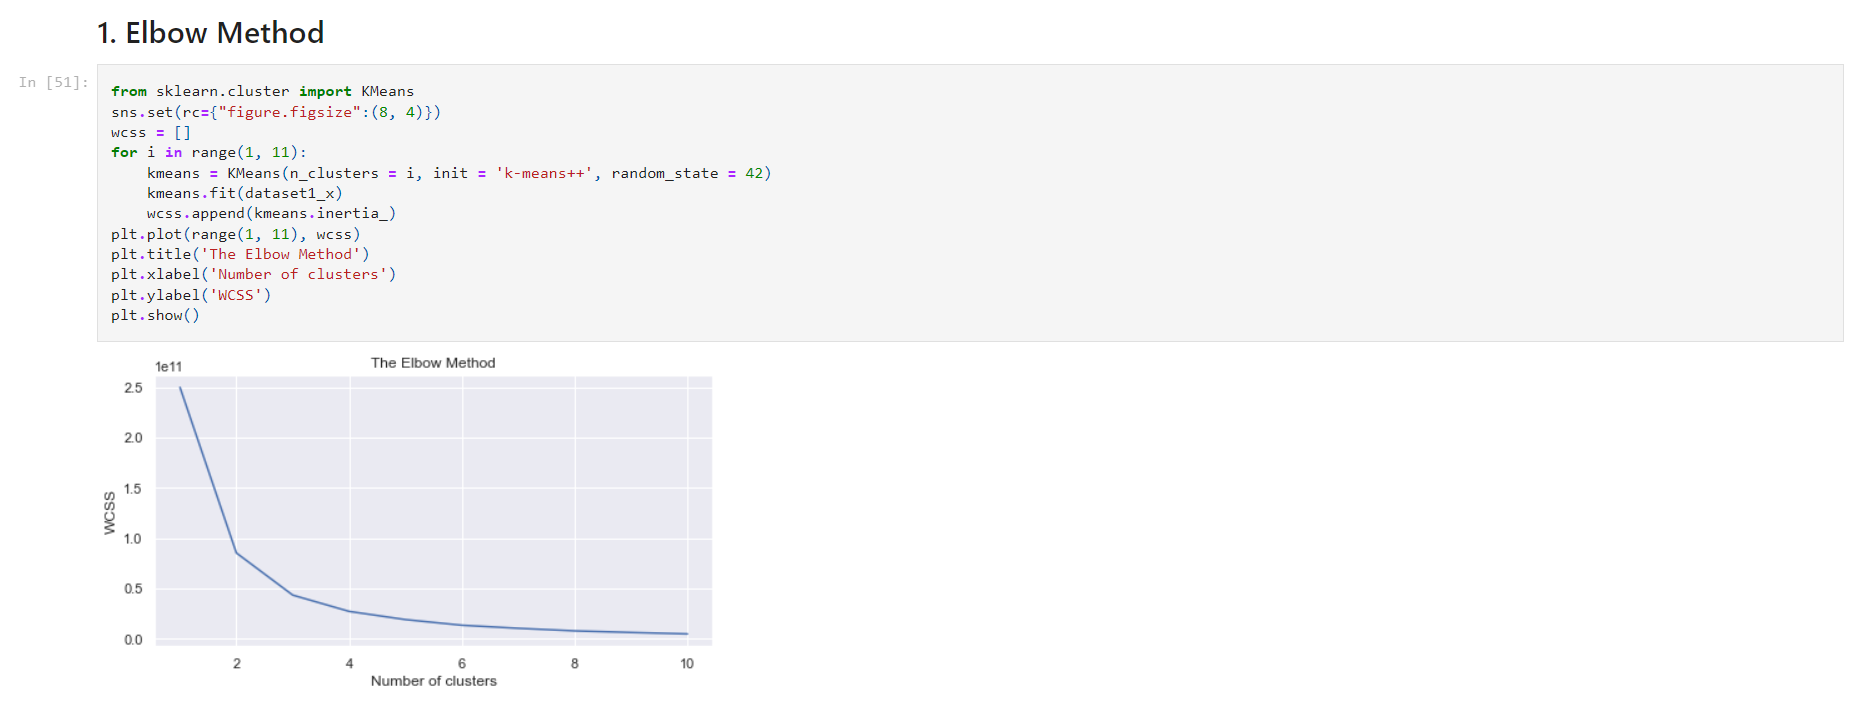

## 2. Silhouette Method
Menggunakan metode silhouette untuk mencari banyaknya cluster yang optimal

In [23]:
import sklearn.metrics as metrics
for i in range(2,11):
  labels=KMeans(n_clusters=i,random_state=200).fit(dataset1_x).labels_
  print ("Silhouette score for k(clusters) = "+str(i)+" is "+str(metrics.silhouette_score(dataset1_x,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 2 is 0.5700573317165305
Silhouette score for k(clusters) = 3 is 0.5435299328573263
Silhouette score for k(clusters) = 4 is 0.523621893109761
Silhouette score for k(clusters) = 5 is 0.512818832997724
Silhouette score for k(clusters) = 6 is 0.5259542315497822
Silhouette score for k(clusters) = 7 is 0.53277977624234
Silhouette score for k(clusters) = 8 is 0.5280236126155562
Silhouette score for k(clusters) = 9 is 0.5229452345597716
Silhouette score for k(clusters) = 10 is 0.5349811596038747


dipilih n_clusters = 2

## 3. Melatih k_Means model pada dataset

In [24]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(dataset1_x)

## 4. Visualisasi Klaster

In [25]:
dataset1_nonol_reset['y_kmeans'] = y_kmeans

In [26]:
dataset1_nonol_reset

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,y_kmeans
0,1954,46344.0,1,1,38,11,1,6,2,1,6,1
1,1984,26646.0,1,0,26,11,4,20,10,3,5,0
2,1985,33454.0,1,0,32,76,10,56,3,1,23,0
3,1974,30351.0,1,0,19,14,0,24,3,3,2,0
4,1950,5648.0,1,1,68,28,0,6,1,1,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1116,1984,11012.0,1,0,82,24,3,26,7,1,23,0
1117,1970,44802.0,0,0,71,853,10,143,13,10,20,1
1118,1986,26816.0,0,0,50,5,1,6,3,4,3,0
1119,1981,56981.0,0,0,91,908,48,217,32,12,24,1


<function matplotlib.pyplot.show(close=None, block=None)>

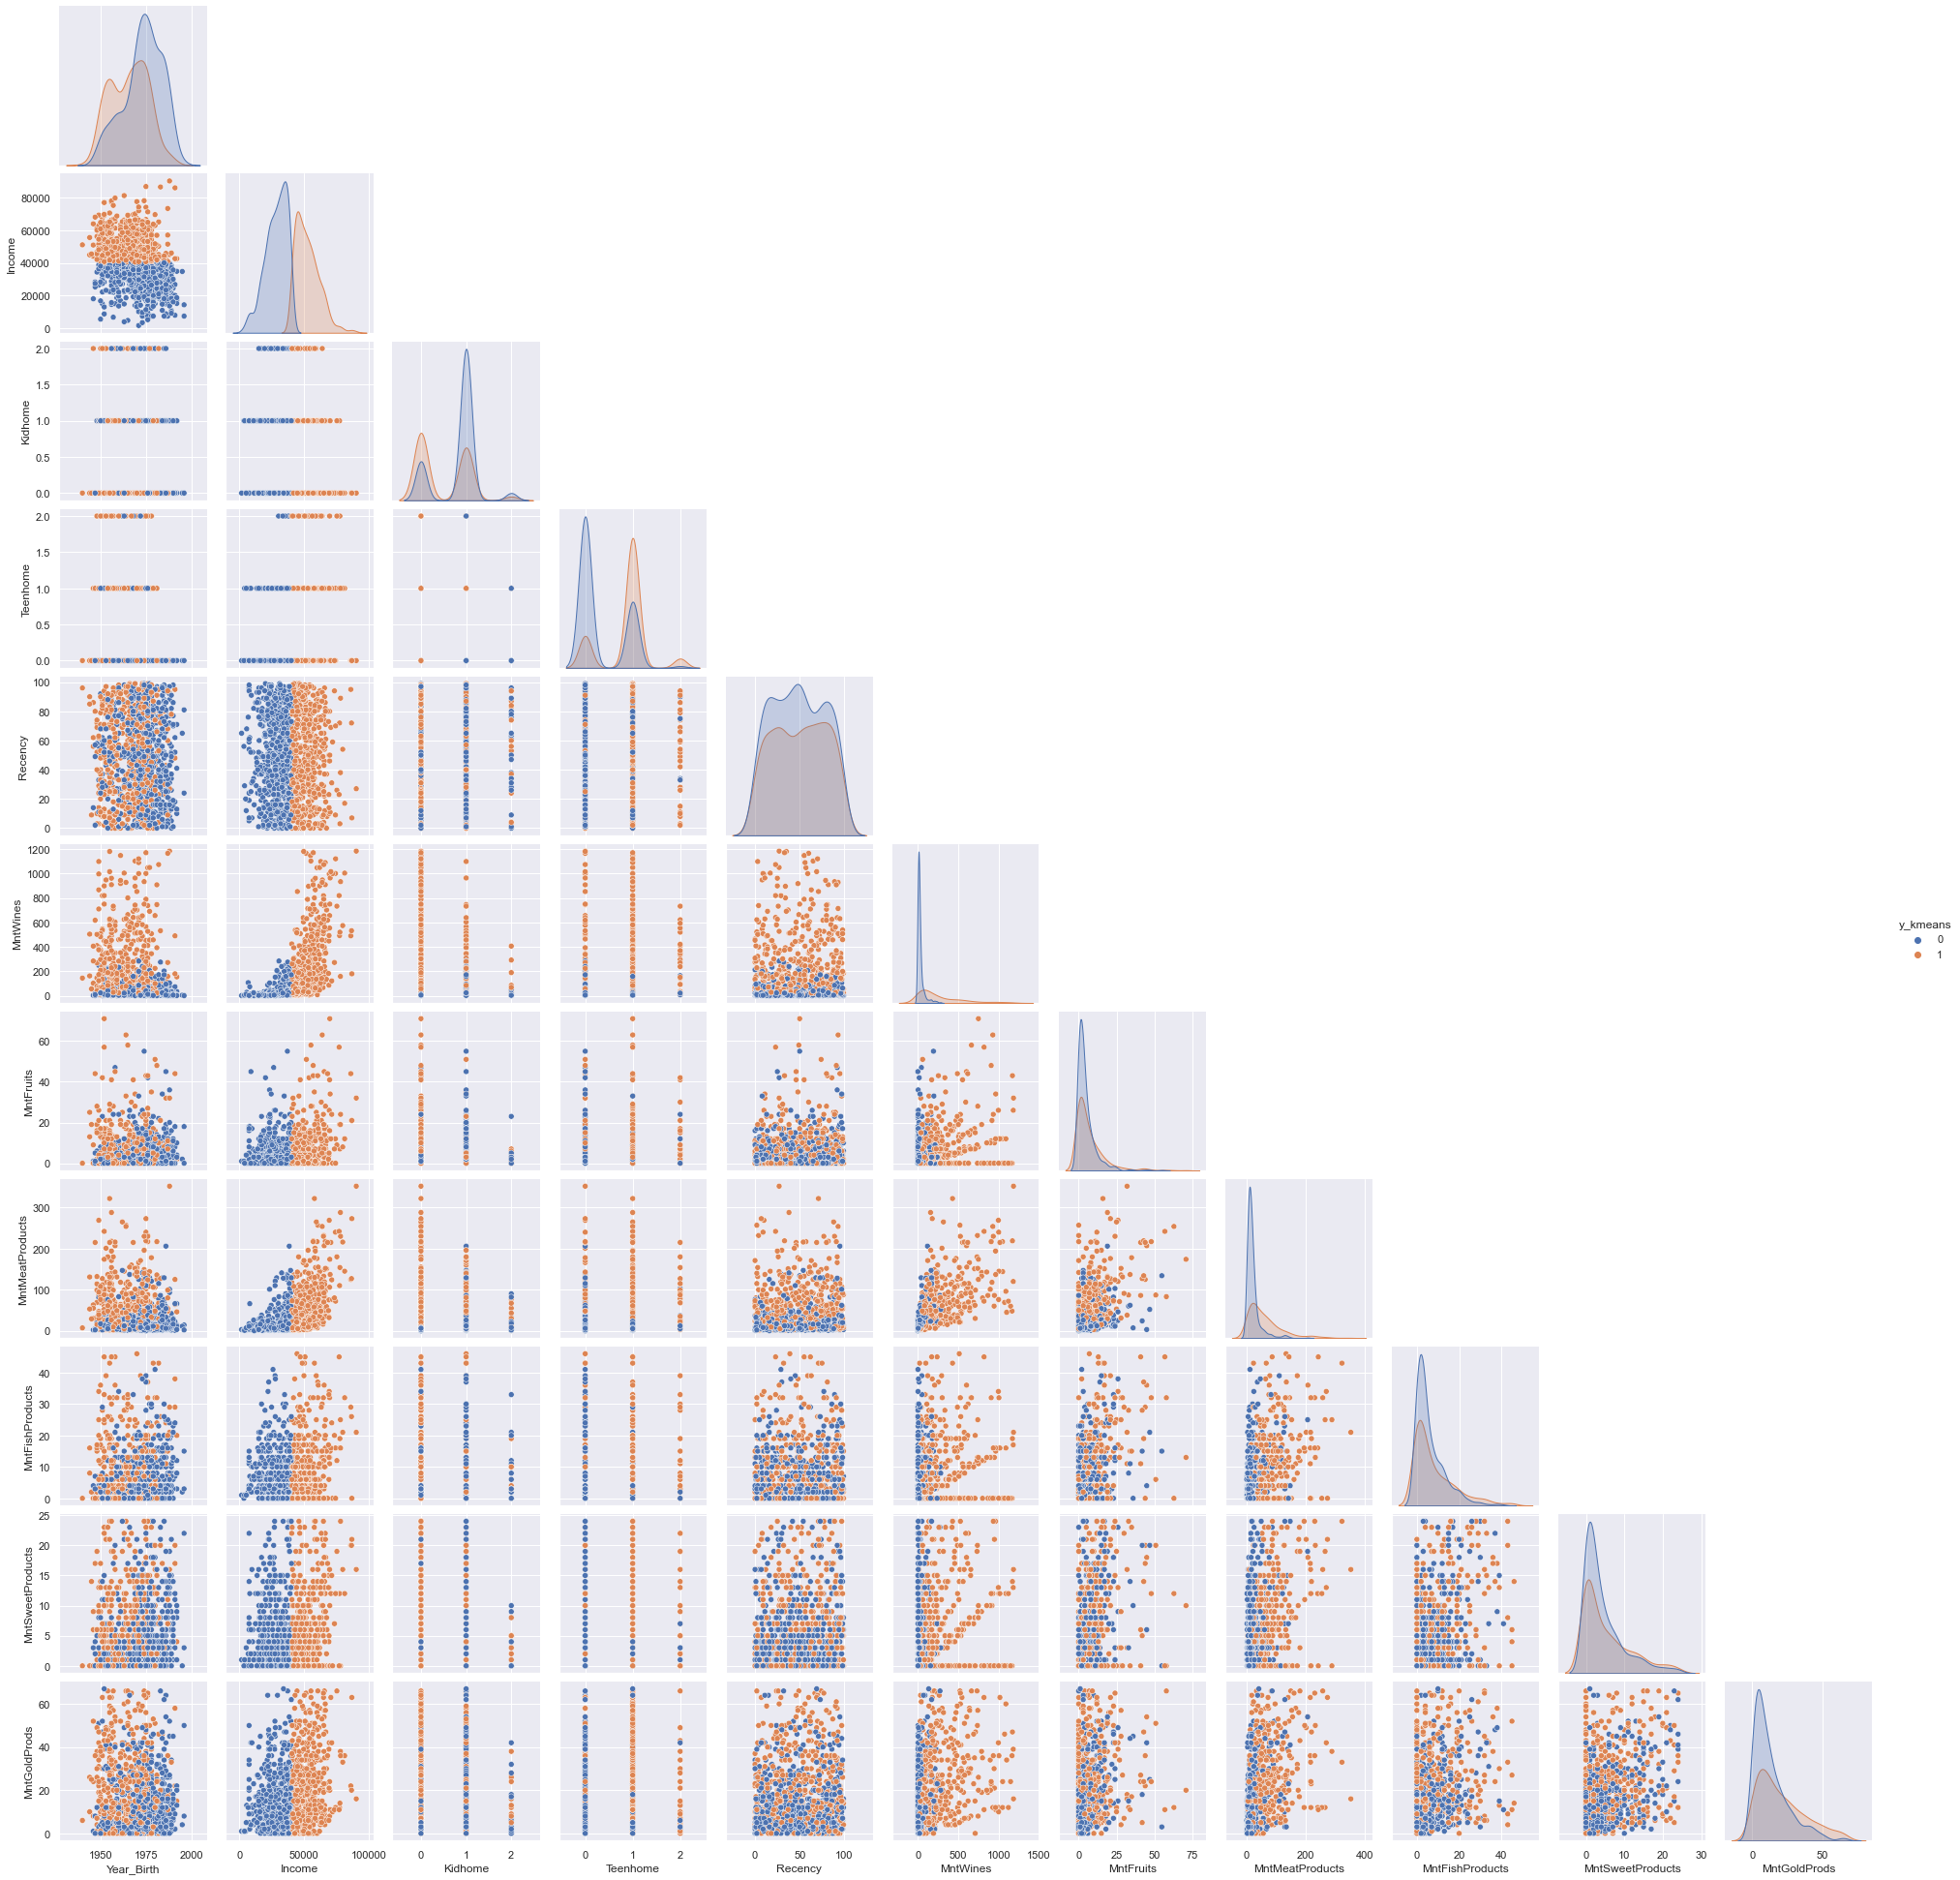

In [27]:
sns.pairplot(dataset1_nonol_reset, corner=True, hue='y_kmeans')
plt.show

# Hierarchical Clustering

## 1. Menggunakan dendrogram untuk mencari jumlah klaster yang optimal

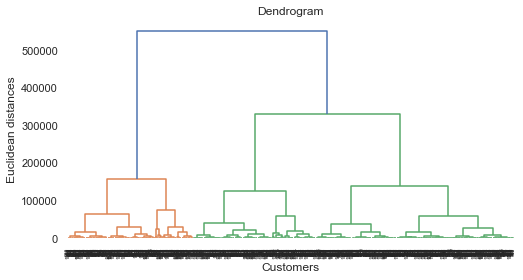

In [28]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(dataset1_x, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

Dipilih n_clusters = 3

## 2. Melatih model Hierarchical Clustering pada dataset

In [29]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(dataset1_x)

## 3. Visualisasi Hierarchical Clustering

In [30]:
dataset1_nonol_reset['y_hc'] = y_hc

In [31]:
dataset1_nonol_reset

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,y_kmeans,y_hc
0,1954,46344.0,1,1,38,11,1,6,2,1,6,1,1
1,1984,26646.0,1,0,26,11,4,20,10,3,5,0,2
2,1985,33454.0,1,0,32,76,10,56,3,1,23,0,1
3,1974,30351.0,1,0,19,14,0,24,3,3,2,0,1
4,1950,5648.0,1,1,68,28,0,6,1,1,13,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116,1984,11012.0,1,0,82,24,3,26,7,1,23,0,2
1117,1970,44802.0,0,0,71,853,10,143,13,10,20,1,1
1118,1986,26816.0,0,0,50,5,1,6,3,4,3,0,2
1119,1981,56981.0,0,0,91,908,48,217,32,12,24,1,0


<function matplotlib.pyplot.show(close=None, block=None)>

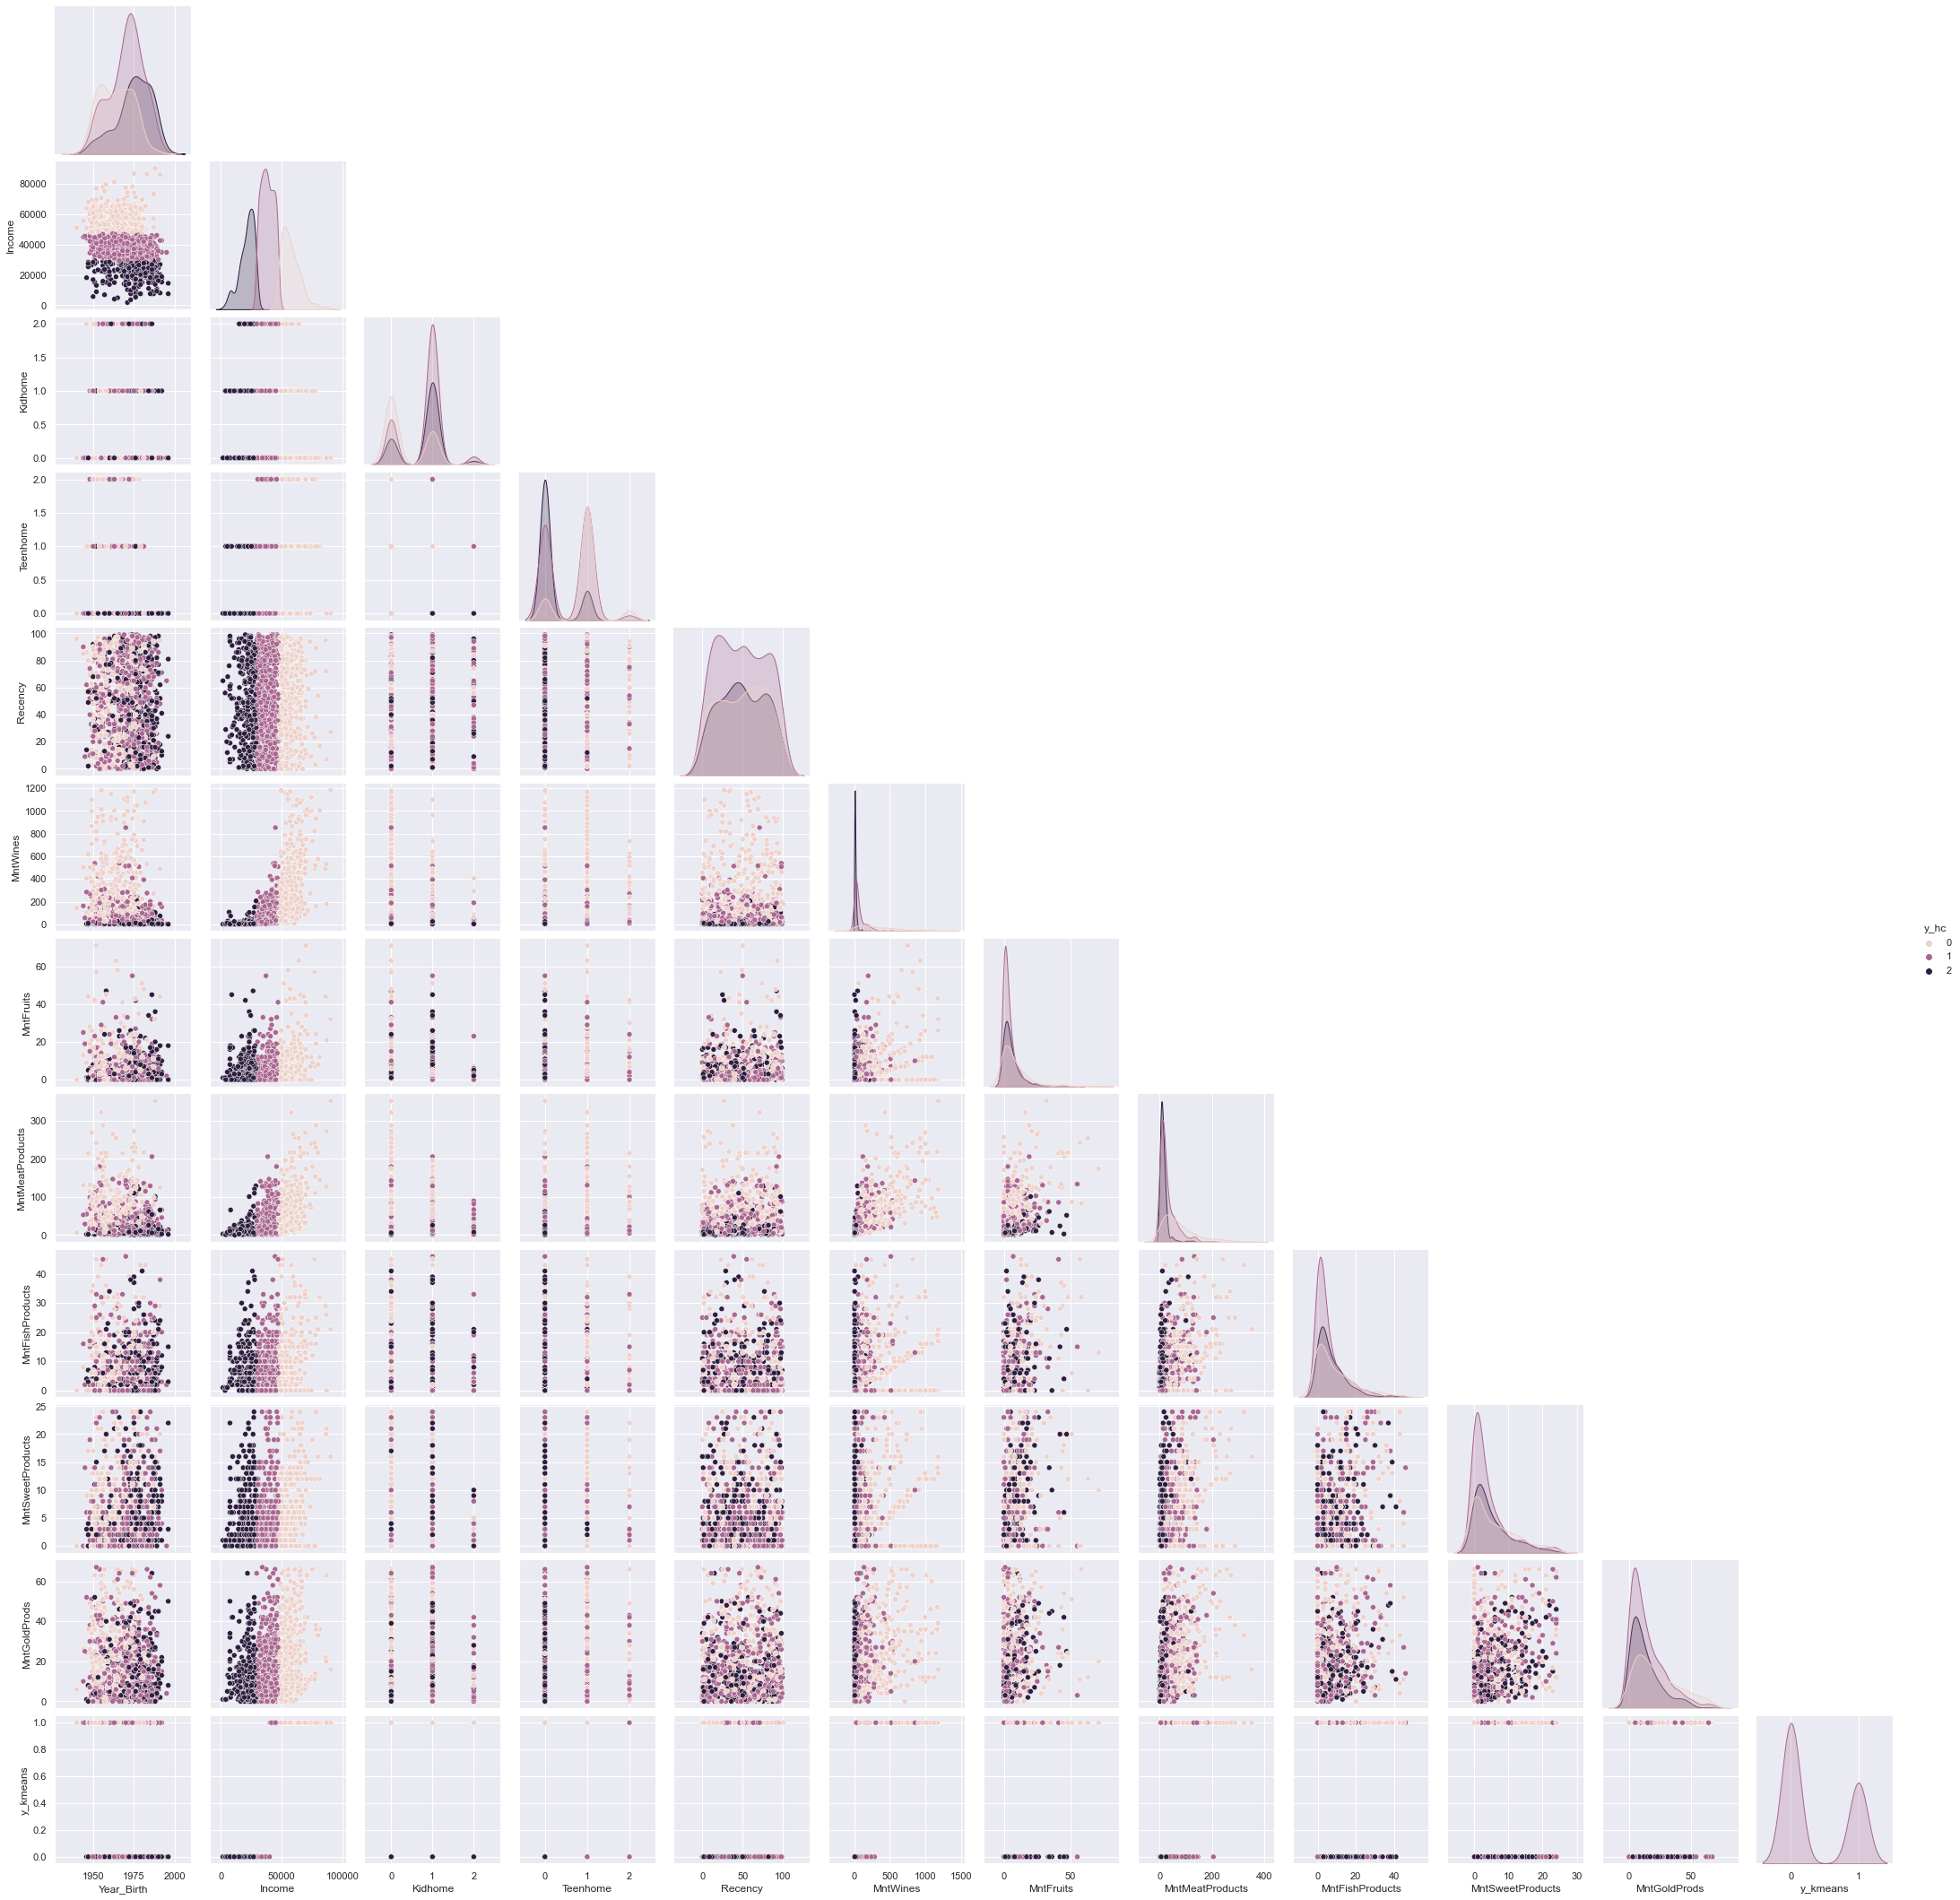

In [32]:
sns.pairplot(dataset1_nonol_reset, corner=True, hue='y_hc')
plt.show

# Kesimpulan
Clustering yang dibuat hanya baik pada kolom Income, baik untuk Clustering biasa ataupun Hierarchical Clustering.

# Soal nomor 2
Diberikan dataset berikut: dataset titanic. Buatlah neural network sederhana yang serupa dengan regresi logistik dengan menggunakan Tensorflow (TANPA mengunakaan framework keras). Tentunya, sebelum dapat dibangun model machine learningnya, kalian harus melakukan preprocessing data terlebih dahulu.

Penjelasan data
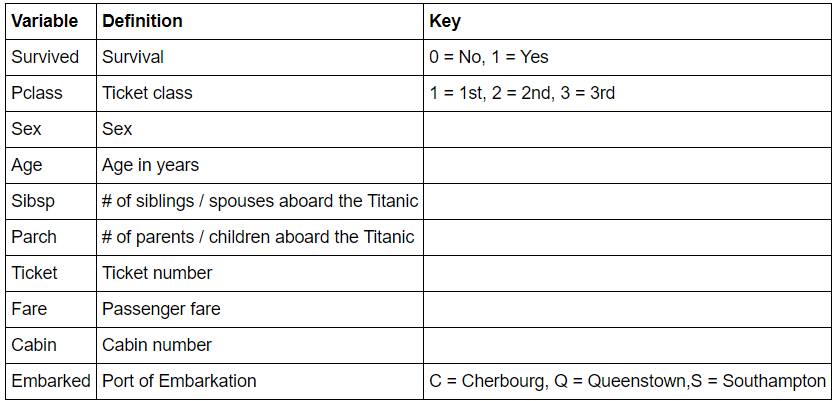

Pclass: A proxy for socio-economic status (SES)\
1st = Upper\
2nd = Middle\
3rd = Lower\

Age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5\

Sibsp: The dataset defines family relations in this way...\
Sibling = brother, sister, stepbrother, stepsister\
Spouse = husband, wife (mistresses and fiancés were ignored)\

Parch: The dataset defines family relations in this way...\
Parent = mother, father\
Child = daughter, son, stepdaughter, stepson\
Some children travelled only with a nanny, therefore parch=0 for them.\

Install tensorflow (belom punya)

In [33]:
!pip install tensorflow --user

# Import Library

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import dataset
Upload dataset yang akan digunakan dan observasi.

In [2]:
dataset2 = pd.read_csv('train.csv')
dataset2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Data Preprocessing

## 1. Melihat jumlah data null pada dataset

In [4]:
print(dataset2.isna().sum().to_string())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2


Pada kolom Age perlu di-imputing karena banyak missing value, sedangkan missing value yang ada di kolom Embarked boleh dilakukan deletion. Selain itu pada kolom Cabin harus dihapus karena terlalu banyak missing value jika dibandingkan dengan total observasi.

## 2. Menghapus kolom-kolom fitur yang dirasa tidak berguna dari DataFrame secara permanen

Cabin tidak berguna karena terlalu banyak null

In [5]:
dataset2.drop(['PassengerId','Name','Pclass','Ticket','Fare','Cabin'],axis=1, inplace=True)

In [6]:
dataset2

,Survived,Sex,Age,SibSp,Parch,Embarked
0,0,male,22.0,1,0,S
1,1,female,38.0,1,0,C
2,1,female,26.0,0,0,S
3,1,female,35.0,1,0,S
4,0,male,35.0,0,0,S
...,...,...,...,...,...,...
886,0,male,27.0,0,0,S
887,1,female,19.0,0,0,S
888,0,female,NaN,1,2,S
889,1,male,26.0,0,0,C


## 3. Melihat jumlah data duplikat pada dataset

In [7]:
dataset2.duplicated().sum()

394

## 4. Deletion
Deletion dilakukan pada observasi dengan duplikasi dan nilai NaN yang sedikit pada suatu kolom, yaitu pada kolom Embarked

In [8]:
rownan = dataset2[dataset2['Embarked'].isna()].index.tolist()

In [9]:
dataset2_emb = dataset2.drop(rownan,axis=0)

In [10]:
dataset2_emb = dataset2_emb.reset_index()
dataset2_emb.drop('index', axis=1, inplace=True)

In [11]:
dataset2_emb[dataset2_emb['Embarked'].isna()]

,Survived,Sex,Age,SibSp,Parch,Embarked


In [12]:
dataset2_emb[dataset2_emb.duplicated()]

,Survived,Sex,Age,SibSp,Parch,Embarked
20,0,male,35.0,0,0,S
32,1,female,NaN,0,0,Q
39,1,female,14.0,1,0,C
42,0,male,NaN,0,0,C
45,0,male,NaN,0,0,S
...,...,...,...,...,...,...
881,0,male,28.0,0,0,S
882,0,male,25.0,0,0,S
884,0,male,27.0,0,0,S
885,1,female,19.0,0,0,S


In [13]:
dataset2_droped = dataset2_emb.drop(dataset2_emb[dataset2_emb.duplicated()].index.tolist(),axis=0)

In [14]:
dataset2_droped

,Survived,Sex,Age,SibSp,Parch,Embarked
0,0,male,22.0,1,0,S
1,1,female,38.0,1,0,C
2,1,female,26.0,0,0,S
3,1,female,35.0,1,0,S
4,0,male,35.0,0,0,S
...,...,...,...,...,...,...
877,1,female,56.0,0,1,C
878,1,female,25.0,0,1,S
883,0,female,39.0,0,5,Q
886,0,female,NaN,1,2,S


## 5. Reindex
kita perlu reindex dataframe supaya tidak hancur

In [15]:
dataset2_reset = dataset2_droped.reset_index()
dataset2_reset.drop('index', axis=1, inplace=True)
dataset2_reset

,Survived,Sex,Age,SibSp,Parch,Embarked
0,0,male,22.0,1,0,S
1,1,female,38.0,1,0,C
2,1,female,26.0,0,0,S
3,1,female,35.0,1,0,S
4,0,male,35.0,0,0,S
...,...,...,...,...,...,...
490,1,female,56.0,0,1,C
491,1,female,25.0,0,1,S
492,0,female,39.0,0,5,Q
493,0,female,NaN,1,2,S


## 6. Encoding kolom-kolom kategorik

One-Hot-Encoding adalah metode encoding dengan cara menambah kolom yang berisi nilai kategorik untuk setiap kolom. Kolom tersebut akan berisi nilai 0 atau 1.
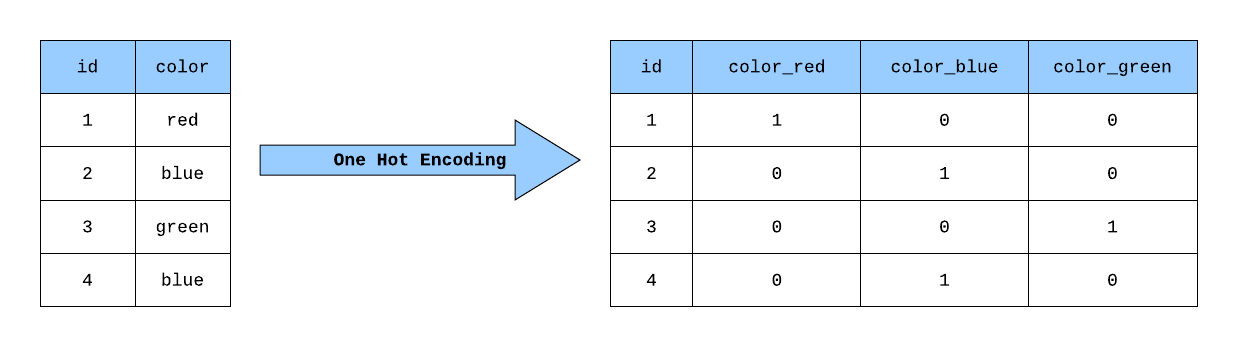

In [16]:
kolom_ohe = ['Sex','Embarked']

In [17]:
for i in kolom_ohe:
    dataset2_reset = pd.get_dummies(data=dataset2_reset,columns=[i])
    
dataset2_ohe = dataset2_reset
dataset2_ohe

,Survived,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,0,1,0,0,1
1,1,38.0,1,0,1,0,1,0,0
2,1,26.0,0,0,1,0,0,0,1
3,1,35.0,1,0,1,0,0,0,1
4,0,35.0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
490,1,56.0,0,1,1,0,1,0,0
491,1,25.0,0,1,1,0,0,0,1
492,0,39.0,0,5,1,0,0,1,0
493,0,NaN,1,2,1,0,0,0,1


## 7. Imputing menggunakan Imputer KNN
Semua *missing values* akan di-*imputing* dengan menggunakan metode KNN-Imputing.

In [18]:
print(dataset2_ohe.isna().sum().to_string())

Survived       0
Age           32
SibSp          0
Parch          0
Sex_female     0
Sex_male       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0


In [19]:
dataset2_ohe[dataset2_ohe['Age'].isna()]

,Survived,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
5,0,NaN,0,0,0,1,0,1,0
17,1,NaN,0,0,0,1,0,0,1
19,1,NaN,0,0,1,0,1,0,0
25,0,NaN,0,0,0,1,1,0,0
27,1,NaN,0,0,1,0,0,1,0
28,0,NaN,0,0,0,1,0,0,1
30,1,NaN,1,0,1,0,1,0,0
34,1,NaN,0,0,0,1,1,0,0
41,0,NaN,1,0,0,1,0,1,0
42,0,NaN,2,0,0,1,1,0,0


K yang digunakan adalah akar dari banyaknya sampel, yaitu akar(495) karena biasanya lebih akurat imputasinya

import library KNN-Imputer

In [20]:
from sklearn.impute import KNNImputer
k=math.ceil(np.sqrt(495))
knnimp = KNNImputer(n_neighbors=k)

In [21]:
dataset2_imputed = pd.DataFrame(data=knnimp.fit_transform(dataset2_ohe), columns=dataset2_ohe.columns)
dataset2_imputed

,Survived,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,22.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,38.000000,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,26.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,35.000000,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,35.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
490,1.0,56.000000,0.0,1.0,1.0,0.0,1.0,0.0,0.0
491,1.0,25.000000,0.0,1.0,1.0,0.0,0.0,0.0,1.0
492,0.0,39.000000,0.0,5.0,1.0,0.0,0.0,1.0,0.0
493,0.0,28.347826,1.0,2.0,1.0,0.0,0.0,0.0,1.0


In [22]:
print(dataset2_imputed.isna().sum().to_string())

Survived      0
Age           0
SibSp         0
Parch         0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0


## 8. Data Scaling
menggunakan library sklearn MinMaxScaler untuk menscaling semua data pada setiap fiturnya

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [24]:
dataset2_scaled = pd.DataFrame(data=scaler.fit_transform(dataset2_imputed), columns=dataset2_imputed.columns)
dataset2_scaled

,Survived,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,0.271174,0.125,0.000000,0.0,1.0,0.0,0.0,1.0
1,1.0,0.472229,0.125,0.000000,1.0,0.0,1.0,0.0,0.0
2,1.0,0.321438,0.000,0.000000,1.0,0.0,0.0,0.0,1.0
3,1.0,0.434531,0.125,0.000000,1.0,0.0,0.0,0.0,1.0
4,0.0,0.434531,0.000,0.000000,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
490,1.0,0.698417,0.000,0.166667,1.0,0.0,1.0,0.0,0.0
491,1.0,0.308872,0.000,0.166667,1.0,0.0,0.0,0.0,1.0
492,0.0,0.484795,0.000,0.833333,1.0,0.0,0.0,1.0,0.0
493,0.0,0.350940,0.125,0.333333,1.0,0.0,0.0,0.0,1.0


## 9. Korelasi

In [25]:
corr=dataset2_scaled.corr()
corr_target=corr['Survived']
corr_target

Survived      1.000000
Age          -0.083071
SibSp        -0.162775
Parch        -0.020665
Sex_female    0.400603
Sex_male     -0.400603
Embarked_C    0.134950
Embarked_Q   -0.082663
Embarked_S   -0.078278
Name: Survived, dtype: float64

# ANN Tensorflow untuk Klasifikasi

In [26]:
inputs = dataset2_scaled.drop(['Survived'],axis=1)
targets = dataset2_scaled['Survived']

In [27]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
inputs, targets = sm.fit_resample(inputs, targets)

In [28]:
inputs = tf.convert_to_tensor(inputs,dtype = 'float32')
targets = tf.convert_to_tensor(targets,dtype = 'float32')

In [29]:
# Creating the linear classifier variables
input_dim = 8 #ada 8 fitur
output_dim = 1 #ada 1 fitur
W = tf.Variable(tf.random.normal(shape = (input_dim, output_dim)))
b = tf.Variable(tf.random.normal(shape = (output_dim,)))

In [30]:
# the forward pass
def model(inputs):
    return tf.sigmoid(tf.matmul(inputs, W) + b)
    
# The mean squared error loss function

def entropy_loss(targets, predictions):
    per_sample_losses = - targets * tf.math.log(predictions) - (1 - targets) * tf.math.log(1 - predictions)
    return tf.reduce_mean(per_sample_losses)


# training step 
learning_rate = 0.1
def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = entropy_loss(targets, predictions)
        grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
        W.assign_sub(learning_rate * grad_loss_wrt_W)
        b.assign_sub(learning_rate * grad_loss_wrt_b)
        return loss



In [31]:
# training loop/process/epoch
for step in range(100):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 0.8724
Loss at step 1: 0.8644
Loss at step 2: 0.8570
Loss at step 3: 0.8501
Loss at step 4: 0.8437
Loss at step 5: 0.8377
Loss at step 6: 0.8322
Loss at step 7: 0.8271
Loss at step 8: 0.8223
Loss at step 9: 0.8179
Loss at step 10: 0.8138
Loss at step 11: 0.8099
Loss at step 12: 0.8064
Loss at step 13: 0.8031
Loss at step 14: 0.8000
Loss at step 15: 0.7972
Loss at step 16: 0.7945
Loss at step 17: 0.7920
Loss at step 18: 0.7897
Loss at step 19: 0.7875
Loss at step 20: 0.7855
Loss at step 21: 0.7836
Loss at step 22: 0.7818
Loss at step 23: 0.7801
Loss at step 24: 0.7785
Loss at step 25: 0.7770
Loss at step 26: 0.7756
Loss at step 27: 0.7743
Loss at step 28: 0.7730
Loss at step 29: 0.7718
Loss at step 30: 0.7707
Loss at step 31: 0.7696
Loss at step 32: 0.7686
Loss at step 33: 0.7676
Loss at step 34: 0.7666
Loss at step 35: 0.7657
Loss at step 36: 0.7648
Loss at step 37: 0.7640
Loss at step 38: 0.7632
Loss at step 39: 0.7624
Loss at step 40: 0.7616
Loss at step 41: 0.7609
Lo

In [34]:
predictions = model(inputs)
print(predictions)

tf.Tensor(
[[0.44717264]
 [0.74221885]
 [0.52262384]
 [0.563394  ]
 [0.4871348 ]
 [0.2101208 ]
 [0.5570572 ]
 [0.34948438]
 [0.43835333]
 [0.668845  ]
 [0.40621763]
 [0.63721883]
 [0.43215194]
 [0.30071515]
 [0.47833195]
 [0.6269121 ]
 [0.1298702 ]
 [0.49146855]
 [0.54880744]
 [0.71428066]
 [0.48344463]
 [0.20033824]
 [0.46135533]
 [0.43593588]
 [0.35808703]
 [0.6736582 ]
 [0.3666202 ]
 [0.23127656]
 [0.4957233 ]
 [0.68582237]
 [0.72444993]
 [0.6002509 ]
 [0.65357816]
 [0.52083087]
 [0.6679135 ]
 [0.4357809 ]
 [0.5088052 ]
 [0.5814713 ]
 [0.5341366 ]
 [0.546683  ]
 [0.20997317]
 [0.21756342]
 [0.66589534]
 [0.5009491 ]
 [0.37378573]
 [0.7720712 ]
 [0.541481  ]
 [0.7257991 ]
 [0.50417215]
 [0.648115  ]
 [0.36785284]
 [0.3538688 ]
 [0.62591577]
 [0.5318798 ]
 [0.3168365 ]
 [0.6172936 ]
 [0.53366846]
 [0.42853025]
 [0.43293878]
 [0.46964282]
 [0.47607008]
 [0.43703204]
 [0.6468582 ]
 [0.47607008]
 [0.45036194]
 [0.28710923]
 [0.5373432 ]
 [0.4394168 ]
 [0.46502873]
 [0.46135533]
 [0.48940

In [35]:
predictions=np.round(predictions)
predictions

array([[0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],

In [37]:
from sklearn.metrics import f1_score, accuracy_score

In [40]:
accuracy_score(targets,predictions)

0.5719844357976653

In [41]:
f1_score(targets,predictions)

0.578544061302682

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Fungsi untuk menampilkan evaluasi parametrik
def evaluation_parametrics(name,y_val, y_pred):
    
    print("\n------------------------{}------------------------\n".format(name))

    cm_test = confusion_matrix(y_val, y_pred)
    t1 = ConfusionMatrixDisplay(cm_test)    
    print("\nClassification Report for Data Test\n")
    print(classification_report(y_val, y_pred))   
    print("--------------------------------------------------------------------------")

    t1.plot()


------------------------Machine Learning - Classification------------------------


Classification Report for Data Test

              precision    recall  f1-score   support

         0.0       0.57      0.56      0.57       257
         1.0       0.57      0.59      0.58       257

    accuracy                           0.57       514
   macro avg       0.57      0.57      0.57       514
weighted avg       0.57      0.57      0.57       514

--------------------------------------------------------------------------


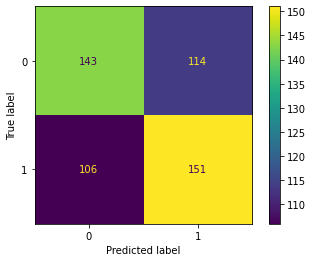

In [43]:
evaluation_parametrics("Machine Learning - Classification", targets, predictions)

# Soal nomor 3
Diberikan dataset lagu di Spotify untuk mengklasifikasikan emosi masing-masing lagu.
Buatlah deep neural network untuk melakukan proses klasifikasi, lakukan
hyperparameter tuning hingga didapat model yang terbaik. Lakukan analisis terhadap
accuracy, precision, recall dan f1-score nya (sebelum melakukan training model, jangan
lupa untuk melakukan data preprocessing).

Penjelasan dataset
duration_ms: The duration of the track in milliseconds.

key: The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

time_signature: An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

instrumentalness: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

id: The Spotify ID for the track.

type: The object type: “audio_features”

popularity: The popularity of the track. The value will be between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Artist and album popularity is derived mathematically from track popularity. Note that the popularity value may lag actual popularity by a few days: the value is not updated in real time.

# Import Library

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import chi2
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import keras_tuner as kt

from imblearn.over_sampling import SMOTE

from tensorflow import keras

# Import dataset
Upload dataset yang akan digunakan dan observasi.

In [45]:
dataset3 = pd.read_csv('Spotify Songs Emotion.csv')
dataset3

,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels
0,195000.0,0.611,0.614,-8.815,0.0672,0.01690,0.000794,0.7530,0.520,128.050,3.446154e-07,2
1,194641.0,0.638,0.781,-6.848,0.0285,0.01180,0.009530,0.3490,0.250,122.985,1.464234e-07,1
2,217573.0,0.560,0.810,-8.029,0.0872,0.00710,0.000008,0.2410,0.247,170.044,4.007850e-07,1
3,443478.0,0.525,0.699,-4.571,0.0353,0.01780,0.000088,0.0888,0.199,92.011,7.959809e-08,0
4,225862.0,0.367,0.771,-5.863,0.1060,0.36500,0.000001,0.0965,0.163,115.917,4.693131e-07,1
...,...,...,...,...,...,...,...,...,...,...,...,...
277933,276360.0,0.777,0.725,-9.012,0.0470,0.12600,0.010800,0.0917,0.851,128.349,1.700680e-07,1
277934,284773.0,0.543,0.482,-12.789,0.1940,0.08530,0.000092,0.1110,0.415,193.513,6.812444e-07,1
277935,241307.0,0.527,0.942,-5.640,0.0366,0.01150,0.000000,0.1880,0.495,148.723,1.516740e-07,2
277936,234333.0,0.768,0.829,-5.109,0.0313,0.09640,0.000029,0.0970,0.962,118.773,1.335706e-07,1


In [46]:
dataset3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277938 entries, 0 to 277937
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   duration (ms)     277938 non-null  float64
 1   danceability      277938 non-null  float64
 2   energy            277938 non-null  float64
 3   loudness          277938 non-null  float64
 4   speechiness       277938 non-null  float64
 5   acousticness      277938 non-null  float64
 6   instrumentalness  277938 non-null  float64
 7   liveness          277938 non-null  float64
 8   valence           277938 non-null  float64
 9   tempo             277938 non-null  float64
 10  spec_rate         277938 non-null  float64
 11  labels            277938 non-null  int64  
dtypes: float64(11), int64(1)
memory usage: 25.4 MB


# Data Preprocessing

## 1. Melihat jumlah data null pada dataset

In [47]:
print(dataset3.isna().sum().to_string())

duration (ms)       0
danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
spec_rate           0
labels              0


## 2. Melihat jumlah data duplikat pada dataset


In [48]:
dataset3.duplicated().sum()

1678

## 3. Deletion
Dilakukan untuk menghapus data duplikasi

In [49]:
dataset3_deleted = dataset3.drop(dataset3[dataset3.duplicated()].index.tolist(),axis=0)

In [50]:
dataset3_deleted

,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels
0,195000.0,0.611,0.614,-8.815,0.0672,0.01690,0.000794,0.7530,0.520,128.050,3.446154e-07,2
1,194641.0,0.638,0.781,-6.848,0.0285,0.01180,0.009530,0.3490,0.250,122.985,1.464234e-07,1
2,217573.0,0.560,0.810,-8.029,0.0872,0.00710,0.000008,0.2410,0.247,170.044,4.007850e-07,1
3,443478.0,0.525,0.699,-4.571,0.0353,0.01780,0.000088,0.0888,0.199,92.011,7.959809e-08,0
4,225862.0,0.367,0.771,-5.863,0.1060,0.36500,0.000001,0.0965,0.163,115.917,4.693131e-07,1
...,...,...,...,...,...,...,...,...,...,...,...,...
277933,276360.0,0.777,0.725,-9.012,0.0470,0.12600,0.010800,0.0917,0.851,128.349,1.700680e-07,1
277934,284773.0,0.543,0.482,-12.789,0.1940,0.08530,0.000092,0.1110,0.415,193.513,6.812444e-07,1
277935,241307.0,0.527,0.942,-5.640,0.0366,0.01150,0.000000,0.1880,0.495,148.723,1.516740e-07,2
277936,234333.0,0.768,0.829,-5.109,0.0313,0.09640,0.000029,0.0970,0.962,118.773,1.335706e-07,1


## 4. Reindex
kita perlu reindex dataframe supaya tidak hancur

In [51]:
dataset3_reset = dataset3_deleted.reset_index()
dataset3_reset.drop('index', axis=1, inplace=True)
dataset3_reset

,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels
0,195000.0,0.611,0.614,-8.815,0.0672,0.01690,0.000794,0.7530,0.520,128.050,3.446154e-07,2
1,194641.0,0.638,0.781,-6.848,0.0285,0.01180,0.009530,0.3490,0.250,122.985,1.464234e-07,1
2,217573.0,0.560,0.810,-8.029,0.0872,0.00710,0.000008,0.2410,0.247,170.044,4.007850e-07,1
3,443478.0,0.525,0.699,-4.571,0.0353,0.01780,0.000088,0.0888,0.199,92.011,7.959809e-08,0
4,225862.0,0.367,0.771,-5.863,0.1060,0.36500,0.000001,0.0965,0.163,115.917,4.693131e-07,1
...,...,...,...,...,...,...,...,...,...,...,...,...
276255,276360.0,0.777,0.725,-9.012,0.0470,0.12600,0.010800,0.0917,0.851,128.349,1.700680e-07,1
276256,284773.0,0.543,0.482,-12.789,0.1940,0.08530,0.000092,0.1110,0.415,193.513,6.812444e-07,1
276257,241307.0,0.527,0.942,-5.640,0.0366,0.01150,0.000000,0.1880,0.495,148.723,1.516740e-07,2
276258,234333.0,0.768,0.829,-5.109,0.0313,0.09640,0.000029,0.0970,0.962,118.773,1.335706e-07,1


## 5. Encoding kolom labels
One-Hot-Encoding adalah metode encoding dengan cara menambah kolom yang berisi nilai kategorik untuk setiap kolom. Kolom tersebut akan berisi nilai 0 atau 1. Hal ini juga berlaku untuk kolom dengan data kategorik ordinal.
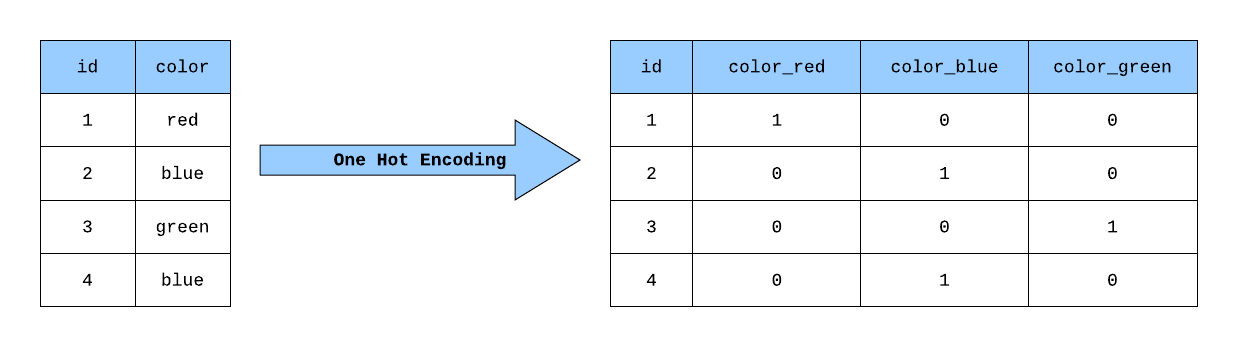

In [52]:
dataset3_reset = pd.get_dummies(data=dataset3_reset,columns=['labels'])
dataset3_ohe = dataset3_reset
dataset3_ohe

,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels_0,labels_1,labels_2,labels_3
0,195000.0,0.611,0.614,-8.815,0.0672,0.01690,0.000794,0.7530,0.520,128.050,3.446154e-07,0,0,1,0
1,194641.0,0.638,0.781,-6.848,0.0285,0.01180,0.009530,0.3490,0.250,122.985,1.464234e-07,0,1,0,0
2,217573.0,0.560,0.810,-8.029,0.0872,0.00710,0.000008,0.2410,0.247,170.044,4.007850e-07,0,1,0,0
3,443478.0,0.525,0.699,-4.571,0.0353,0.01780,0.000088,0.0888,0.199,92.011,7.959809e-08,1,0,0,0
4,225862.0,0.367,0.771,-5.863,0.1060,0.36500,0.000001,0.0965,0.163,115.917,4.693131e-07,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276255,276360.0,0.777,0.725,-9.012,0.0470,0.12600,0.010800,0.0917,0.851,128.349,1.700680e-07,0,1,0,0
276256,284773.0,0.543,0.482,-12.789,0.1940,0.08530,0.000092,0.1110,0.415,193.513,6.812444e-07,0,1,0,0
276257,241307.0,0.527,0.942,-5.640,0.0366,0.01150,0.000000,0.1880,0.495,148.723,1.516740e-07,0,0,1,0
276258,234333.0,0.768,0.829,-5.109,0.0313,0.09640,0.000029,0.0970,0.962,118.773,1.335706e-07,0,1,0,0


## 6. Data Scaling
menggunakan library sklearn MinMaxScaler untuk menscaling semua data pada setiap fiturnya

In [53]:
scaler = MinMaxScaler()

In [54]:
dataset3_scaled = pd.DataFrame(data=scaler.fit_transform(dataset3_ohe), columns=dataset3_ohe.columns)
dataset3_scaled

,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels_0,labels_1,labels_2,labels_3
0,0.048118,0.617796,0.614,0.788894,0.069637,0.016968,0.000794,0.7530,0.520,0.522766,0.005771,0.0,0.0,1.0,0.0
1,0.048026,0.645096,0.781,0.819210,0.029534,0.011847,0.009530,0.3490,0.250,0.502088,0.002452,0.0,1.0,0.0,0.0
2,0.053886,0.566229,0.810,0.801008,0.090363,0.007129,0.000008,0.2410,0.247,0.694207,0.006711,0.0,1.0,0.0,0.0
3,0.111615,0.530839,0.699,0.854305,0.036580,0.017871,0.000088,0.0888,0.199,0.375636,0.001333,1.0,0.0,0.0,0.0
4,0.056004,0.371082,0.771,0.834392,0.109845,0.366466,0.000001,0.0965,0.163,0.473233,0.007859,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276255,0.068909,0.785642,0.725,0.785857,0.048705,0.126506,0.010800,0.0917,0.851,0.523987,0.002848,0.0,1.0,0.0,0.0
276256,0.071059,0.549039,0.482,0.727644,0.201036,0.085643,0.000092,0.1110,0.415,0.790020,0.011408,0.0,1.0,0.0,0.0
276257,0.059951,0.532861,0.942,0.837829,0.037927,0.011546,0.000000,0.1880,0.495,0.607164,0.002540,0.0,0.0,1.0,0.0
276258,0.058169,0.776542,0.829,0.846013,0.032435,0.096787,0.000029,0.0970,0.962,0.484893,0.002237,0.0,1.0,0.0,0.0


## 7. Korelasi

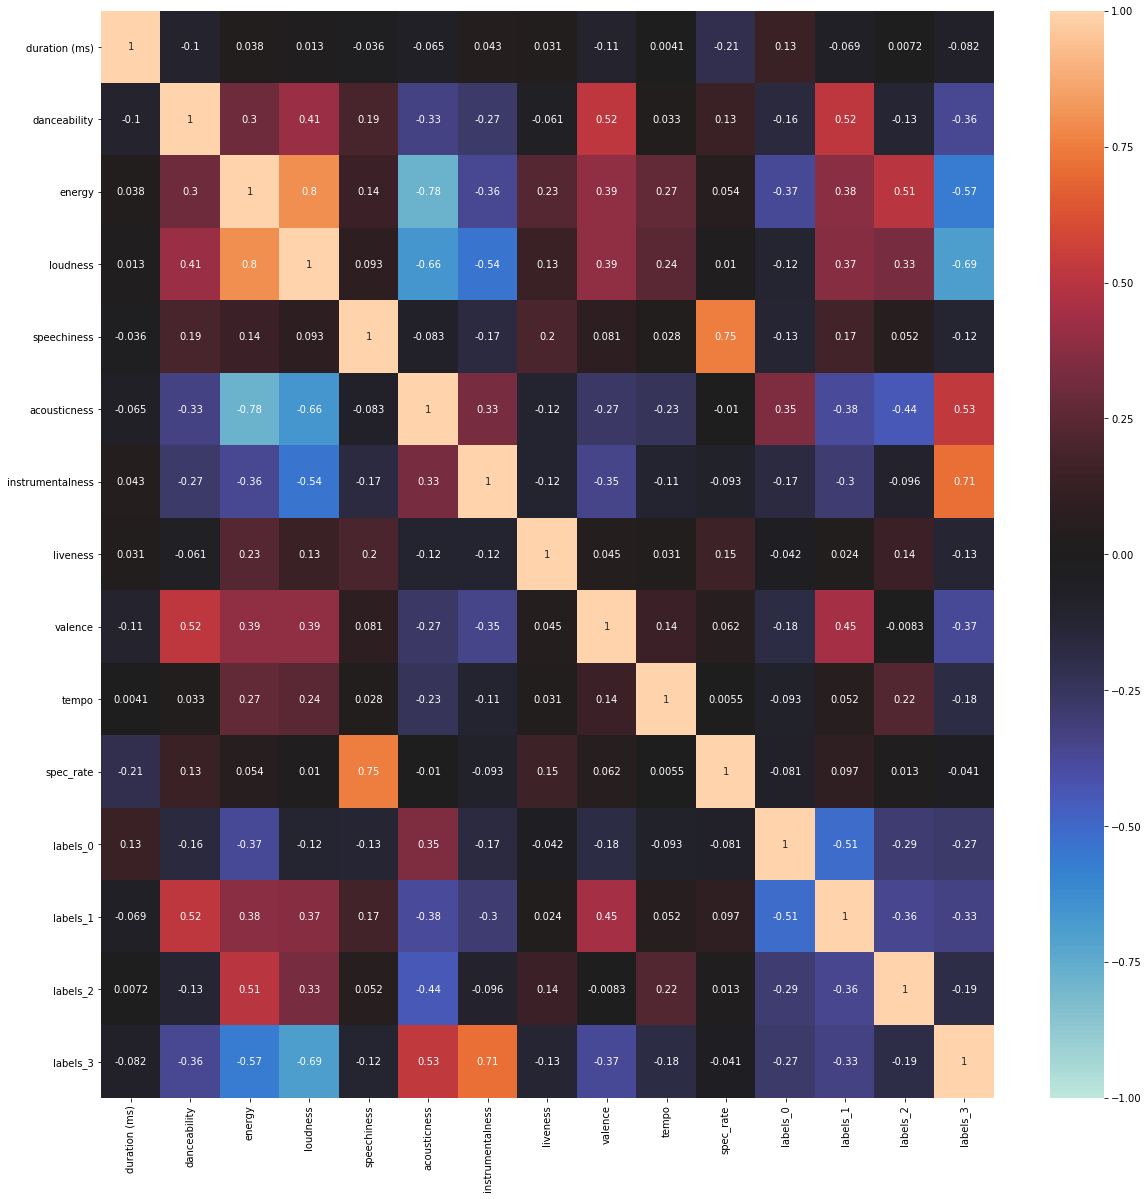

In [55]:
corr = dataset3_scaled.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corr, vmin=-1, center=0, vmax=1, annot=True)
plt.show()

# Setup ANN 
Membuat ANN

In [56]:
X = dataset3_scaled.copy()
y = pd.DataFrame()
for i in ["labels_0","labels_1","labels_2","labels_3"]:
    X = X.drop(i,axis = 1).copy()
    y[i] = dataset3_scaled[i]

In [57]:
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8, stratify=y, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5, stratify=y_rem, random_state=42)

# Hyperparameter Tuning dengan menggunakan keras
akan dilakukan tuning untuk menentukan layer layer ANN, activation function, dll

In [63]:
def build_model_reg(hp):
    model = keras.Sequential()
    n_layers_d = hp.Int('n_hid_layers', 1, 10, 1)
    for i in range(n_layers_d):
        n_dense = hp.Int(f'n_neurons_{i}', 8, 128, step=8)
        act = hp.Choice(f'activation_{i}', ['relu','sigmoid'])
        Lrate1 = hp.Float(f"Lrate_{i}",0.001,0.01,sampling = 'log')
        Lrate2 = hp.Float(f"Lrate_{i}",0.001,0.01,sampling = 'log')
        if i == 0 :
            model.add(keras.layers.Flatten(input_shape = (11,)))
        else:
            if hp.Boolean('l1'):
                Reg = keras.regularizers.l1(Lrate1)
            elif hp.Boolean('l2'):
                Reg = keras.regularizers.l2(Lrate2)
            else:
                Reg = None
            model.add(keras.layers.Dense(n_dense, activation=act,
                                           kernel_regularizer = Reg))

    model.add(keras.layers.Dense(4, activation="sigmoid"))

    lr = hp.Float('learning_rate', 0.001, 0.1,sampling = "log")
    opt = keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=opt, loss='categorical_crossentropy',metrics = ["accuracy"])

    return model

In [64]:
keras.backend.clear_session()

tuner = kt.BayesianOptimization(hypermodel=build_model_reg,
                                objective='val_loss',
                                max_trials=10,
                                directory='tuner_dir_3121',
                                project_name='tune_housing_model')

INFO:tensorflow:Reloading Tuner from tuner_dir_3121\tune_housing_model\tuner0.json


In [65]:
tuner.search_space_summary()

Search space summary
Default search space size: 34
n_hid_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 10, 'step': 1, 'sampling': 'linear'}
n_neurons_0 (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 128, 'step': 8, 'sampling': 'linear'}
activation_0 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid'], 'ordered': False}
Lrate_0 (Float)
{'default': 0.001, 'conditions': [], 'min_value': 0.001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}
learning_rate (Float)
{'default': 0.001, 'conditions': [], 'min_value': 0.001, 'max_value': 0.1, 'step': None, 'sampling': 'log'}
n_neurons_1 (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 128, 'step': 8, 'sampling': 'linear'}
activation_1 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid'], 'ordered': False}
Lrate_1 (Float)
{'default': 0.001, 'conditions': [], 'min_value': 0.001, 'max_value': 0.01, 'step': None, 'sampli

In [66]:
early_stop = keras.callbacks.EarlyStopping(patience=10, monitor='val_loss',
                                              restore_best_weights=False,
                                              verbose=1)

tuner.search(X_train, y_train, validation_data=(X_valid, y_valid),
             epochs=40, batch_size=256, callbacks=[early_stop])

Trial 10 Complete [00h 01m 56s]
val_loss: 0.4499692916870117

Best val_loss So Far: 0.18299999833106995
Total elapsed time: 00h 11m 57s
INFO:tensorflow:Oracle triggered exit


In [67]:
model = build_model_reg(tuner.get_best_hyperparameters()[0])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 11)                0         
                                                                 
 dense_6 (Dense)             (None, 56)                672       
                                                                 
 dense_7 (Dense)             (None, 104)               5928      
                                                                 
 dense_8 (Dense)             (None, 24)                2520      
                                                                 
 dense_9 (Dense)             (None, 32)                800       
                                                                 
 dense_10 (Dense)            (None, 96)                3168      
                                                                 
 dense_11 (Dense)            (None, 48)               

In [74]:
early_stop = keras.callbacks.EarlyStopping(patience=10, monitor='val_loss',
                                              restore_best_weights=True,
                                              verbose=1)

history1 = model.fit(X_train, y_train, validation_data=(X_valid, y_valid),
                    epochs=500, batch_size=256, callbacks=[early_stop])

Epoch 1/500
864/864 [==============================] - 3s 4ms/step - loss: 0.1890 - accuracy: 0.9186 - val_loss: 0.1888 - val_accuracy: 0.9174
Epoch 2/500
864/864 [==============================] - 3s 4ms/step - loss: 0.1878 - accuracy: 0.9190 - val_loss: 0.2016 - val_accuracy: 0.9125
Epoch 3/500
864/864 [==============================] - 3s 4ms/step - loss: 0.1874 - accuracy: 0.9194 - val_loss: 0.1850 - val_accuracy: 0.9190
Epoch 4/500
864/864 [==============================] - 3s 4ms/step - loss: 0.1853 - accuracy: 0.9205 - val_loss: 0.1903 - val_accuracy: 0.9171
Epoch 5/500
864/864 [==============================] - 3s 4ms/step - loss: 0.1853 - accuracy: 0.9201 - val_loss: 0.1943 - val_accuracy: 0.9173
Epoch 6/500
864/864 [==============================] - 4s 4ms/step - loss: 0.1834 - accuracy: 0.9212 - val_loss: 0.1864 - val_accuracy: 0.9201
Epoch 7/500
864/864 [==============================] - 3s 4ms/step - loss: 0.1822 - accuracy: 0.9217 - val_loss: 0.1836 - val_accuracy: 0.9195

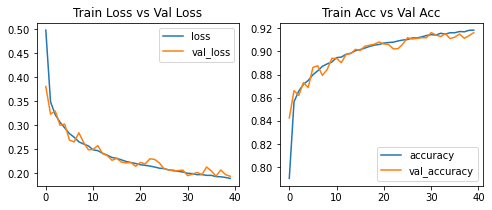

In [76]:
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(len(loss))

fig, ax = plt.subplots(1, 2, figsize=(8,3))
ax[0].plot(epochs, loss)
ax[0].plot(epochs, val_loss)
ax[0].legend(['loss', 'val_loss'], loc='upper right')
ax[0].set_title('Train Loss vs Val Loss')
ax[1].plot(epochs, accuracy)
ax[1].plot(epochs, val_accuracy)
ax[1].legend(['accuracy', 'val_accuracy'], loc='lower right')
ax[1].set_title('Train Acc vs Val Acc')
plt.show()

In [77]:
y_pred_test = model.predict(X_test)

864/864 [==============================] - 1s 1ms/step


In [78]:
model.evaluate(X_test,y_test)

864/864 [==============================] - 1s 2ms/step - loss: 0.1729 - accuracy: 0.9272


[0.1728833168745041, 0.9272424578666687]

In [79]:
Ypred_test = model.predict(X_test)
df_Ypred_test = []
for i in Ypred_test:
    df_Ypred_test.append(np.argmax(i))

864/864 [==============================] - 1s 1ms/step


In [80]:
df_Ypred_test = pd.DataFrame(df_Ypred_test,columns = ["labels"])
df_Ypred_test = pd.get_dummies(data=df_Ypred_test,columns=["labels"])
df_Ypred_test

,labels_0,labels_1,labels_2,labels_3
0,0,1,0,0
1,1,0,0,0
2,0,0,0,1
3,0,1,0,0
4,0,0,0,1
...,...,...,...,...
27621,0,1,0,0
27622,1,0,0,0
27623,1,0,0,0
27624,0,1,0,0


In [84]:
Accuracy_test = accuracy_score(y_test, df_Ypred_test)
precision_test = precision_score(y_test, df_Ypred_test, average = 'weighted')
recall_test = recall_score(y_test, df_Ypred_test, average = 'weighted')
f1_score_model = f1_score(y_test, df_Ypred_test, average="weighted")

In [86]:
print('f1 score : ',f1_score_model)
print('recall : ',recall_test)
print('precision : ',precision_test)
print('Accuracy : ',Accuracy_test)

f1 score :  0.9270756630976535
recall :  0.927242452761891
precision :  0.9274526985090783
Accuracy :  0.927242452761891
